In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.MLPs import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
    

11501568/11490434 [==============================] - 19s 2us/step


In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


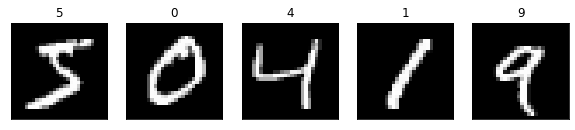

In [7]:
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [8]:
to_categorical(3, num_classes=10)


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [13]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [14]:
# Create simple Neural Network MLP
MLP = Sequential()
MLP.add(Flatten(input_shape=(28,28)))
MLP.add(Dense(5, activation='sigmoid'))
MLP.add(Dense(10, activation='softmax'))

In [15]:
MLP.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [16]:
MLP.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [17]:
MLP.fit(X_train, y_train, epochs=5, 
          validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6759 - acc: 0.5094 - val_loss: 1.3001 - val_acc: 0.6039
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1497 - acc: 0.6804 - val_loss: 1.0287 - val_acc: 0.7268
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9678 - acc: 0.7311 - val_loss: 0.9075 - val_acc: 0.7471
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8999 - acc: 0.7423 - val_loss: 0.8135 - val_acc: 0.7782
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8514 - acc: 0.7578 - val_loss: 0.8125 - val_acc: 0.7795


In [18]:
predictions = MLP.predict(X_test)
print(predictions)

[[1.74015434e-03 3.99201959e-02 1.82355661e-03 ... 6.79213583e-01
  1.60541520e-01 4.02768366e-02]
 [1.37655856e-02 5.93954325e-02 8.01932454e-01 ... 6.63090323e-04
  2.28750687e-02 1.03648585e-04]
 [4.48997278e-04 9.37345326e-01 3.71573269e-02 ... 7.74668390e-03
  3.81777086e-03 1.63935067e-04]
 ...
 [2.17219605e-03 4.84885415e-04 4.29505380e-05 ... 1.28092363e-01
  1.65563659e-03 7.50711322e-01]
 [3.08952238e-02 1.46486913e-03 2.27910914e-02 ... 3.36679071e-02
  5.57048261e-01 1.47468653e-02]
 [4.61373199e-03 1.27752256e-02 1.06947079e-01 ... 6.15148107e-03
  1.27622187e-01 1.85338105e-03]]


In [19]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[7 2 1 ... 9 8 6]


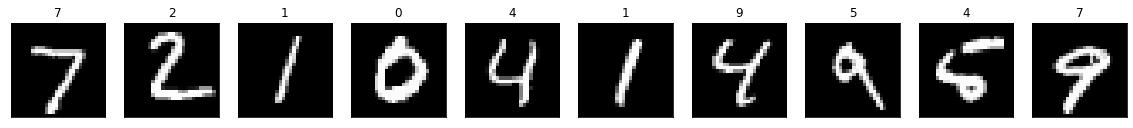

In [20]:
fig, axes = plt.subplots(ncols=10, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()